# Multiple Linear Regression
## Bike Sharing Assignment

#### Problem Statement:

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing 
Corona pandemic. We need to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 

Essentially, the company wants to understand —

- Which variables are significant in predicting the demand for shared bikes

- How well those variables describe the bike demands


## Step 1: Reading and Understanding the Data

Let us first import NumPy and Pandas and read the Bike dataset



In [455]:
# Supress Warnings

import warnings
warnings.filterwarnings('ignore')

In [456]:
import numpy as np
import pandas as pd

In [457]:
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [458]:
bike.shape

(730, 16)

In [459]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [460]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [461]:
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday',
       'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed',
       'casual', 'registered', 'cnt'],
      dtype='object')

In [462]:
bike = bike.drop(['instant','dteday','casual','registered'], axis=1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Step 2: Visualising the Data

Let's now spend some time doing what is arguably
 the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

In [463]:
import matplotlib.pyplot as plt
import seaborn as sns

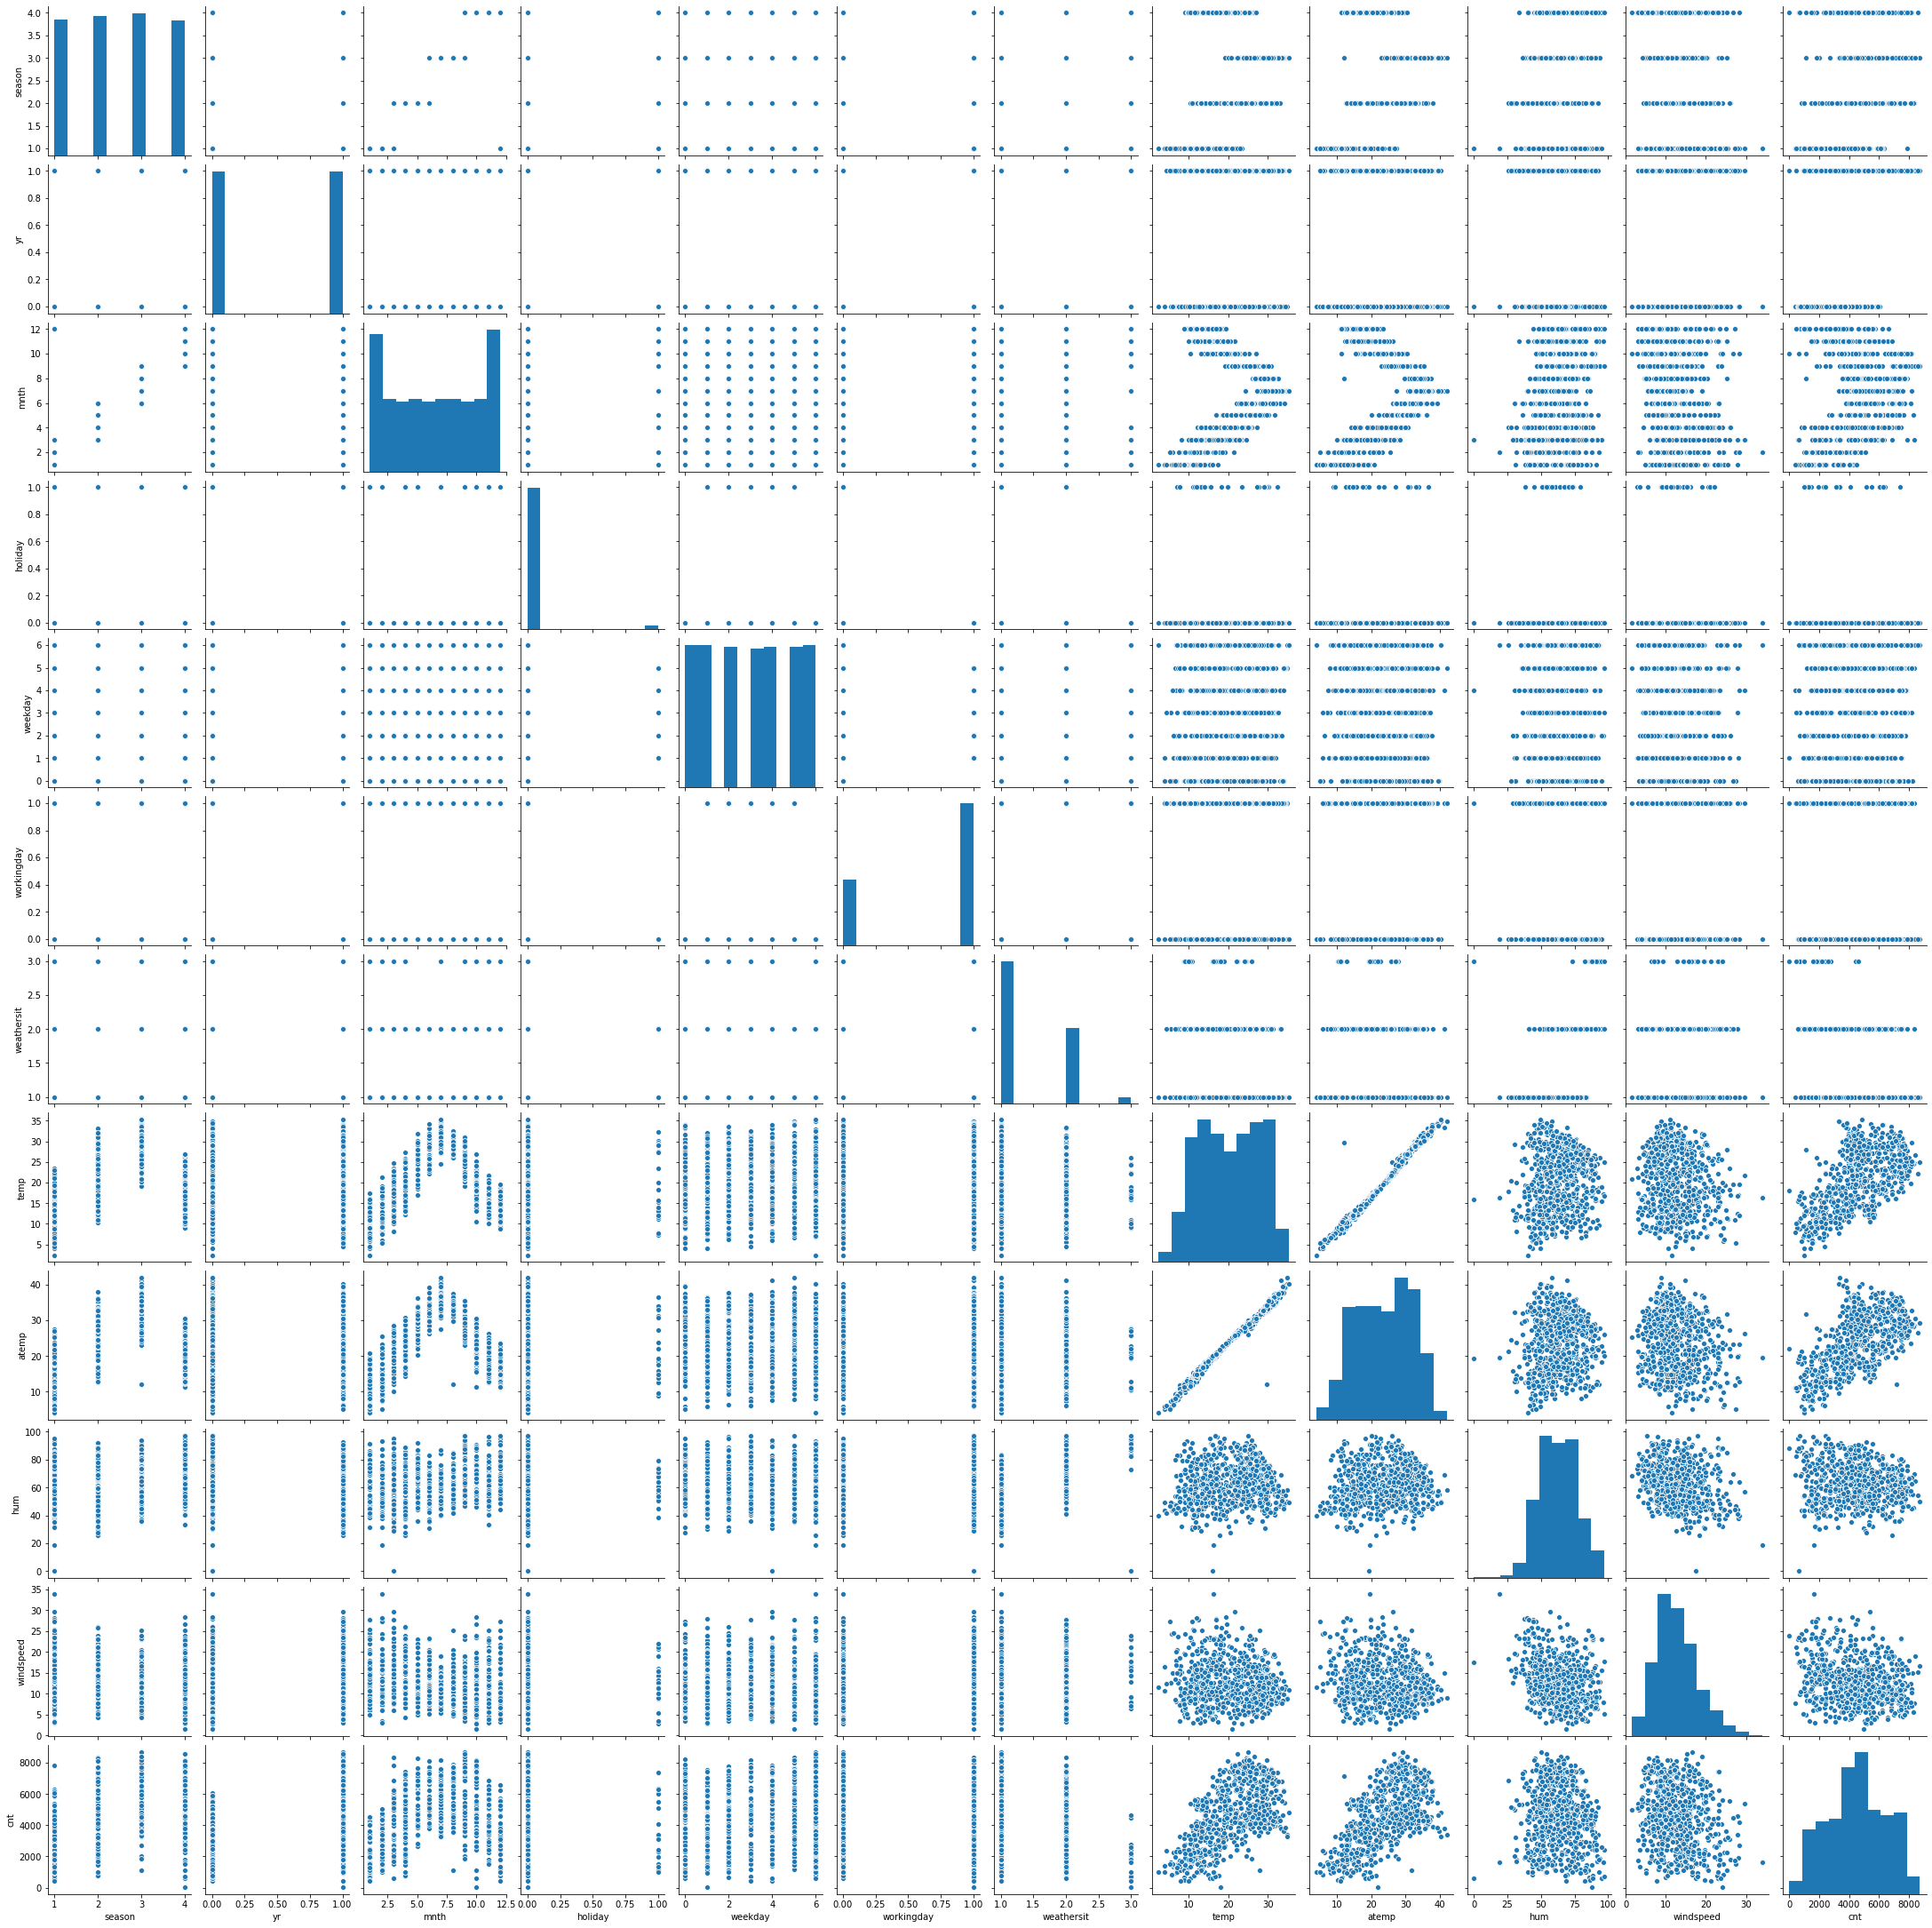

In [464]:
sns.pairplot(bike)
plt.show()

### Visualising Categorical Variables



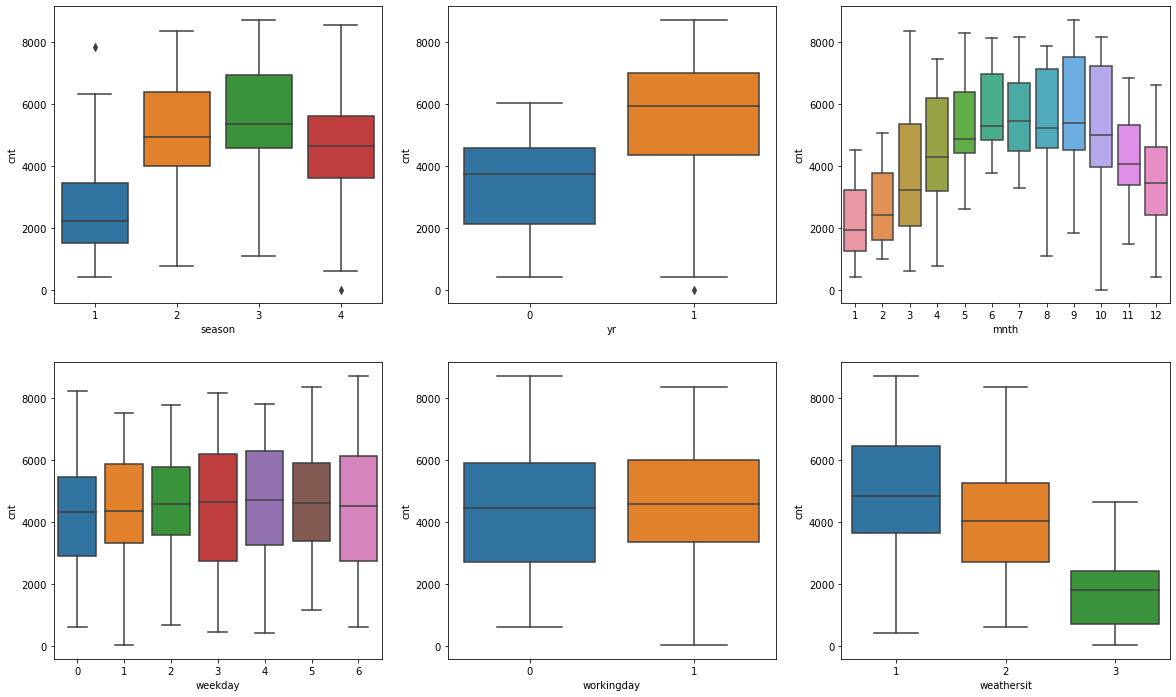

In [465]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike)
plt.subplot(2,3,2)
sns.boxplot(x = 'yr', y = 'cnt', data = bike)
plt.subplot(2,3,3)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike)
plt.subplot(2,3,4)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike)
plt.subplot(2,3,5)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike)
plt.subplot(2,3,6)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike)


plt.show()

observations :
- 1st chart : we can see that during 2:summer & 3:fall the count of users is high 
- 2nd chart : we can see that the no.of users registered have increased from 2018 to 2019
- 3rd chart : Months 5-9 have high no.of registered users which is similar to 1st chart we have
- 4th chart : weekdays doesnt make any huge difference in the count of registered users
- 5th chart : This shows that weekends/holidays definitely have some difference in the no.of users compared to working days
- 6th chart : From this chart we come to know that users tend to rent for bike more when the weather is (Clear, Few clouds, Partly cloudy, Partly cloudy) whereas during (Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds)





### Visualizing Numeric variables

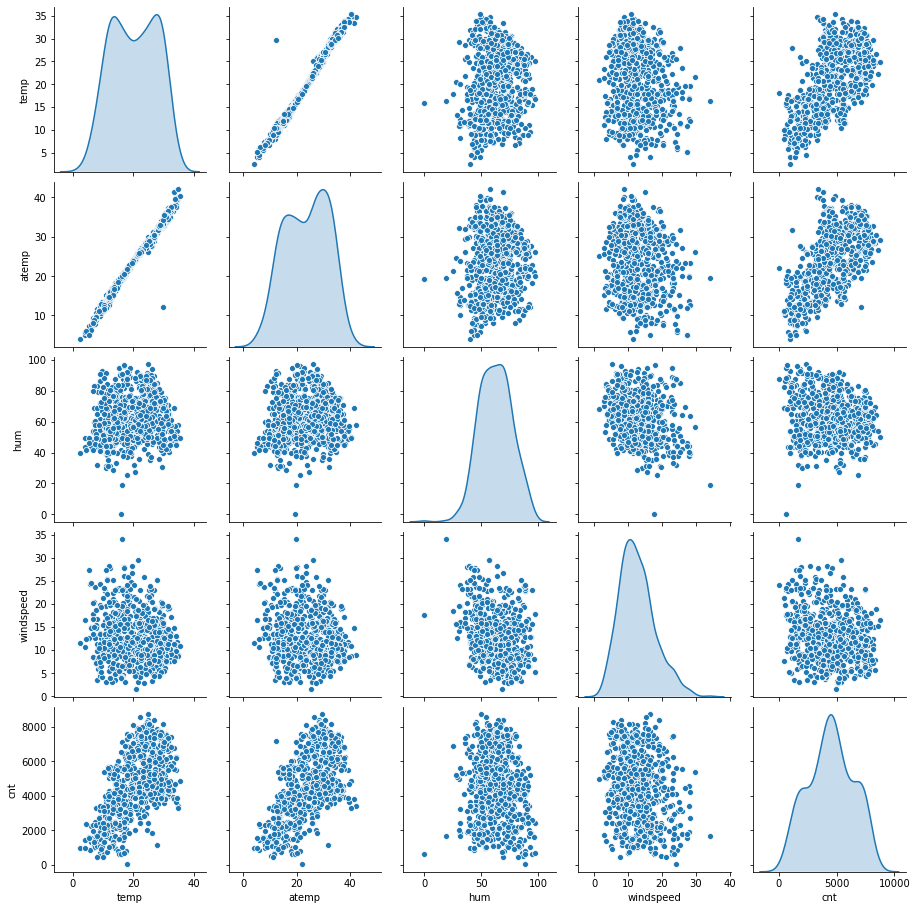

In [466]:
bike_num = bike[[ 'temp', 'atemp', 'hum', 'windspeed','cnt']]

sns.pairplot(bike_num, diag_kind='kde')
plt.show()

There is a LINEAR RELATION between 'temp','atemp' and 'cnt'

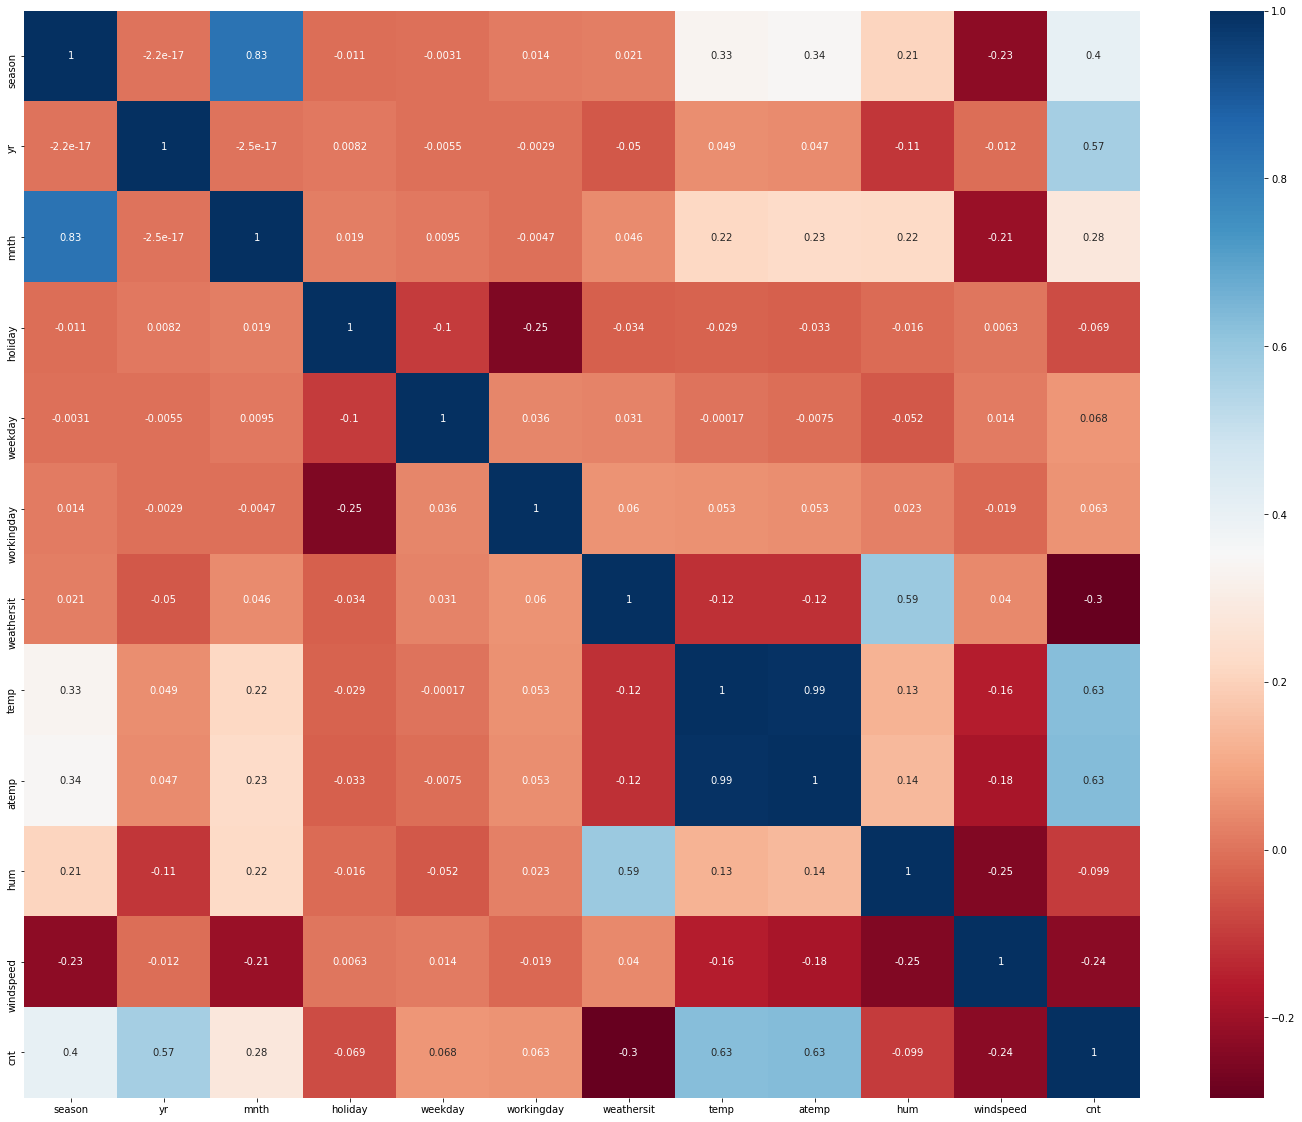

In [467]:
###Correlation Matrix¶

plt.figure(figsize = (25,20))
sns.heatmap(bike.corr(), annot = True, cmap="RdBu")
plt.show()


## Step 3: Data Preparation

In [468]:
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


#### Dummy Variables

In [469]:
# Get the dummy variables for the feature 'weathersit' and store it in a new variable - 'status'

# Let's drop the first column from status df using 'drop_first = True'

status = pd.get_dummies(bike['weathersit'], drop_first=True)
bike = pd.concat([bike, status], axis = 1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,2,3
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985,1,0
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801,1,0
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0


In [470]:
bike.rename(columns={2:'WS2',3:'WS3'}, inplace=True)
bike = bike.drop(['weathersit'], axis=1)

In [471]:
## 2nd value

status = pd.get_dummies(bike['season'], drop_first=True)
bike = pd.concat([bike, status], axis = 1)
bike.head()

,season,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,WS2,WS3,2,3,4
0,1,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,0
1,1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,0
2,1,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0
3,1,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0
4,1,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0


In [472]:
bike.rename(columns={2:'Season2',3:'Season3',4:'Season4'}, inplace=True)
bike = bike.drop(['season'], axis=1)

In [473]:
## 3rd value

status = pd.get_dummies(bike['weekday'], drop_first=True)
bike = pd.concat([bike, status], axis = 1)
bike.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,...,WS3,Season2,Season3,Season4,1,2,3,4,5,6
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,...,0,0,0,0,0,0,0,0,0,1
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,...,0,0,0,0,1,0,0,0,0,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,...,0,0,0,0,0,1,0,0,0,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,...,0,0,0,0,0,0,1,0,0,0


In [474]:
bike.rename(columns={1:'Day1',2:'Day2',3:'Day3',4:'Day4',5:'Day5',6:'Day6'}, inplace=True)
bike = bike.drop(['weekday'], axis=1)

## Step 4: Splitting the Data into Training and Testing Sets


In [475]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features

In [476]:
from sklearn.preprocessing import MinMaxScaler

In [477]:
scaler = MinMaxScaler()

In [478]:
# Apply scaler() to all the numeric columns

num_vars = [ 'temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

In [479]:
df_train.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,WS2,WS3,Season2,Season3,Season4,Day1,Day2,Day3,Day4,Day5,Day6
653,1,10,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,0,0,1,0,1,0,0,0,0
576,1,7,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0,0,1,0,0,0,0
426,1,3,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,0,0,0,0,0,1
728,1,12,0,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,0,0,0,0,0,0,0,0
482,1,4,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,1,0,0,0,0,0,0,0,1


In [480]:
df_train.describe()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,WS2,WS3,Season2,Season3,Season4,Day1,Day2,Day3,Day4,Day5,Day6
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,6.549020,0.025490,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.343137,0.029412,0.245098,0.262745,0.24902,0.150980,0.131373,0.158824,0.133333,0.127451,0.154902
std,0.500429,3.468714,0.157763,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.475223,0.169124,0.430568,0.440557,0.43287,0.358381,0.338139,0.365870,0.340268,0.333805,0.362166
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,3.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,7.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,10.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,12.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Dividing into X and Y sets for the model building

In [481]:
y_train = df_train.pop('cnt')
X_train = df_train

## Step 5: Building a linear model


### Adding all the variables to the model

In [482]:
# Check all the columns of the dataframe

bike.columns

Index(['yr', 'mnth', 'holiday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt', 'WS2', 'WS3', 'Season2', 'Season3', 'Season4',
       'Day1', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6'],
      dtype='object')

In [483]:
#Build a linear model

import statsmodels.api as sm
X_train_lm = sm.add_constant(X_train)

lr_1 = sm.OLS(y_train, X_train_lm).fit()

lr_1.params

const         0.165559
yr            0.231950
mnth          0.001195
holiday      -0.039370
workingday    0.045570
temp          0.439504
atemp         0.055859
hum          -0.126893
windspeed    -0.178352
WS2          -0.058267
WS3          -0.249850
Season2       0.115422
Season3       0.070161
Season4       0.155209
Day1         -0.010371
Day2         -0.007116
Day3          0.008694
Day4          0.003098
Day5          0.011894
Day6          0.056349
dtype: float64

In [484]:
print(lr_1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     137.3
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.22e-178
Time:                        11:21:02   Log-Likelihood:                 496.77
No. Observations:                 510   AIC:                            -955.5
Df Residuals:                     491   BIC:                            -875.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1656      0.030      5.469      0.0

In [485]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [486]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
16,Day4,inf
15,Day3,inf
2,holiday,inf
3,workingday,inf
17,Day5,inf
13,Day1,inf
14,Day2,inf
4,temp,390.93
5,atemp,369.09
6,hum,19.15


### Dropping the variable and updating the model

As you can see from the summary and the VIF dataframe, some variables are still are infinite (insignificant).


In [487]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop(['Day1'],1,)


In [488]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [489]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     137.3
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.22e-178
Time:                        11:21:02   Log-Likelihood:                 496.77
No. Observations:                 510   AIC:                            -955.5
Df Residuals:                     491   BIC:                            -875.1
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1656      0.030      5.469      0.0

In [490]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,temp,390.93
5,atemp,369.09
6,hum,19.15
1,mnth,17.56
3,workingday,9.12
11,Season3,8.20
12,Season4,7.17
7,windspeed,4.08
10,Season2,3.52
14,Day3,2.19


In [491]:
# Dropping highly correlated variables and insignificant variables

X = X_train.drop(['atemp'],1,)


In [492]:
# Build a third fitted model
X_train_lm = sm.add_constant(X)

lr_2 = sm.OLS(y_train, X_train_lm).fit()

In [493]:
# Print the summary of the model
print(lr_2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.828
Method:                 Least Squares   F-statistic:                     145.6
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.96e-179
Time:                        11:21:02   Log-Likelihood:                 496.69
No. Observations:                 510   AIC:                            -957.4
Df Residuals:                     492   BIC:                            -881.2
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1662      0.030      5.506      0.0

In [494]:
# Calculate the VIFs again for the new model

vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
15,Day4,inf
2,holiday,inf
3,workingday,inf
16,Day5,inf
12,Day1,inf
13,Day2,inf
14,Day3,inf
4,temp,22.97
5,hum,18.86
1,mnth,17.56


In [495]:
# Dropping highly correlated variables and insignificant variables
X = X.drop('mnth', 1)


In [496]:
# Build a second fitted model
X_train_lm = sm.add_constant(X)

lr_3 = sm.OLS(y_train, X_train_lm).fit()

In [497]:
# Print the summary of the model

print(lr_3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.834
Model:                            OLS   Adj. R-squared:                  0.829
Method:                 Least Squares   F-statistic:                     154.9
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          1.76e-180
Time:                        11:21:02   Log-Likelihood:                 496.55
No. Observations:                 510   AIC:                            -959.1
Df Residuals:                     493   BIC:                            -887.1
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1684      0.030      5.639      0.0

In [498]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
14,Day4,inf
2,workingday,inf
15,Day5,inf
1,holiday,inf
11,Day1,inf
12,Day2,inf
13,Day3,inf
3,temp,22.88
4,hum,17.26
9,Season3,6.49


In [499]:
X = X.drop('hum', 1)

In [500]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_4 = sm.OLS(y_train, X_train_lm).fit()

In [501]:
print(lr_4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.831
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     161.5
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          2.12e-179
Time:                        11:21:03   Log-Likelihood:                 491.30
No. Observations:                 510   AIC:                            -950.6
Df Residuals:                     494   BIC:                            -882.8
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0966      0.020      4.849      0.0

In [502]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,holiday,inf
2,workingday,inf
10,Day1,inf
11,Day2,inf
12,Day3,inf
13,Day4,inf
14,Day5,inf
3,temp,16.11
8,Season3,6.21
4,windspeed,3.71


In [519]:
X = X.drop('holiday', 1)

In [520]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [521]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     167.0
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          3.41e-177
Time:                        11:22:01   Log-Likelihood:                 483.35
No. Observations:                 510   AIC:                            -936.7
Df Residuals:                     495   BIC:                            -873.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0818      0.020      4.120      0.0

In [522]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,30.00
10,Day3,8.67
9,Day2,7.38
11,Day4,7.11
12,Day5,7.01
8,Day1,6.70
2,temp,4.53
3,windspeed,3.53
0,yr,2.03
13,Day6,1.76


In [523]:
X = X.drop('workingday', 1)

In [524]:
# Build a fourth fitted model
X_train_lm = sm.add_constant(X)

lr_5 = sm.OLS(y_train, X_train_lm).fit()

In [525]:
print(lr_5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     175.9
Date:                Wed, 02 Jun 2021   Prob (F-statistic):          3.34e-176
Time:                        11:22:50   Log-Likelihood:                 478.29
No. Observations:                 510   AIC:                            -928.6
Df Residuals:                     496   BIC:                            -869.3
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0799      0.020      3.989      0.0

In [526]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,temp,4.52
2,windspeed,3.52
0,yr,2.02
9,Day3,1.80
12,Day6,1.76
7,Day1,1.74
8,Day2,1.67
10,Day4,1.64
11,Day5,1.64
3,WS2,1.53


The VIFs and p-values both are within an acceptable range. So we go ahead and make our predictions using this model only.

## Step 7: Residual Analysis of the train data


In [507]:
y_train_price = lr_5.predict(X_train_lm)

Text(0.5, 0, 'Errors')

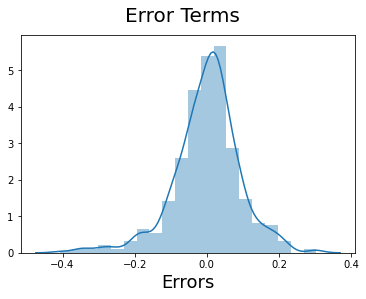

In [508]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

## Step 8: Making Predictions Using the Final Model


In [509]:

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars] = scaler.transform(df_test[num_vars])

In [510]:
df_test.head()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,WS2,WS3,Season2,Season3,Season4,Day1,Day2,Day3,Day4,Day5,Day6
184,0,7,1,0,0.831783,0.769660,0.657364,0.084219,0.692706,1,0,0,1,0,1,0,0,0,0,0
535,1,6,0,1,0.901354,0.842587,0.610133,0.153728,0.712034,0,0,1,0,0,0,0,1,0,0,0
299,0,10,0,1,0.511964,0.496145,0.837699,0.334206,0.303382,1,0,0,0,1,0,0,0,1,0,0
221,0,8,0,1,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,0,0,1,0,0,0
152,0,6,0,1,0.817246,0.741471,0.314298,0.537414,0.569029,0,0,1,0,0,0,0,0,1,0,0


In [511]:
df_test.describe()

,yr,mnth,holiday,workingday,temp,atemp,hum,windspeed,cnt,WS2,WS3,Season2,Season3,Season4,Day1,Day2,Day3,Day4,Day5,Day6
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,6.474886,0.036530,0.698630,0.558941,0.532991,0.638508,0.313350,0.520592,0.319635,0.027397,0.264840,0.246575,0.232877,0.127854,0.164384,0.100457,0.164384,0.178082,0.118721
std,0.500722,3.421875,0.188034,0.459904,0.233698,0.217888,0.148974,0.159947,0.218435,0.467403,0.163612,0.442259,0.432005,0.423633,0.334692,0.371472,0.301297,0.371472,0.383458,0.324202
min,0.000000,1.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,6.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,9.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,12.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### Dividing into X_test and y_test

In [512]:
y_test = df_test.pop('cnt')
X_test = df_test

In [513]:
X.columns

Index(['yr', 'holiday', 'workingday', 'temp', 'windspeed', 'WS2', 'WS3',
       'Season2', 'Season4', 'Day1', 'Day2', 'Day3', 'Day4', 'Day5', 'Day6'],
      dtype='object')

In [514]:
col1=X.columns
X_test=X_test[col1]


In [515]:
# Making predictions using the fourth model
# Adding constant variable to test dataframe
X_test_m4 = sm.add_constant(X_test)

y_pred_m4 = lr_5.predict(X_test_m4)

## Step 9: Model Evaluation

Let's now plot the graph for actual versus predicted values.

Text(0, 0.5, 'y_pred')

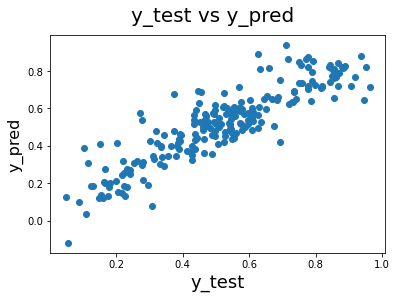

In [516]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred_m4)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

In [517]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred_m4)
r2

0.7884922504288114

In [518]:
n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2


0.7728635989826645

The top 3 predictor variables that influences the bike booking are:


Temperature(0.5771), Year(0.2335), weathersit_3(-0.2778)